# import librabries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import sample
import shutil
import warnings

warnings.filterwarnings("ignore") ##Ignore all sort of warnings

# 1 The dataset given for this problem consists of data extracted from satellite images. The number of features is 36.

In [3]:
dataSet=pd.read_csv("PCA_practice_dataset.csv")
dataSet

,-3.125000000000000000e-02,2.363639999999999908e-01,2.380950000000000011e-01,-9.090910000000000657e-02,0.000000000000000000e+00,3.818179999999999907e-01,3.263159999999999950e-01,-1.562500000000000000e-02,-1.250000000000000000e-01,5.533979999999999455e-01,...,5.769229999999999636e-01,4.712640000000000162e-01,-3.333330000000000320e-02,-4.615380000000000177e-02,5.247519999999999962e-01,4.105260000000000020e-01,-1.562500000000000000e-02.2,-1.875000000000000000e-01.1,4.951459999999999750e-01,5.157890000000000530e-01
0,-0.031250,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.031250,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.125000,0.533981,0.368421
1,-0.031250,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.031250,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.031250,0.650485,0.452632
2,-0.031250,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.093750,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.250000,0.203883,0.094737
3,-0.031250,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.250000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.281250,0.495146,0.410526
4,-0.031250,0.381818,0.357143,-0.024793,0.000000,0.381818,0.431579,-0.015625,-0.031250,0.553398,...,0.480769,0.471264,-0.033333,-0.046154,0.623762,0.515789,0.046875,0.062500,0.592233,0.410526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,0.088958,0.016323,-0.213069,-0.376970,0.117490,0.074181,-0.182175,-0.286841,0.213958,0.240733,...,-0.120300,-0.329808,-0.370927,-0.015385,0.135798,-0.234572,-0.281250,0.093750,0.058469,-0.158971
8037,-0.243556,-0.092159,-0.477827,-0.536054,-0.094557,-0.092159,-0.411973,-0.498926,-0.122852,-0.027792,...,0.077584,-0.261208,-0.527032,-0.012212,0.188800,-0.260264,-0.405176,-0.032324,0.009709,-0.263158
8038,-0.136975,-0.068480,-0.466067,-0.504132,-0.006181,-0.054545,-0.233154,-0.409244,-0.061188,-0.067961,...,-0.168585,-0.566658,-0.532634,-0.279224,-0.223097,-0.539991,-0.534244,-0.181512,-0.053079,-0.416328
8039,-0.163077,-0.090909,-0.476190,-0.517050,-0.096774,-0.090909,-0.359223,-0.437500,-0.250000,-0.029126,...,0.130414,-0.292378,-0.450000,-0.052876,0.029703,-0.288810,-0.406250,-0.031250,0.087379,-0.263158


In [4]:
dataSet.shape

(8041, 35)

# standardizing

In [5]:
from sklearn.preprocessing import StandardScaler
data_std=StandardScaler().fit_transform(dataSet)
print(data_std)

[[ 3.02372432e-01  8.40402388e-01  8.52608891e-01 ...  7.01315837e-01
   1.15019573e+00  9.22121443e-01]
 [ 3.02372432e-01  9.97760483e-01  5.63968718e-01 ...  3.45874567e-01
   1.38672222e+00  1.15411966e+00]
 [ 3.02372432e-01  9.97760483e-01  6.21695782e-01 ... -1.51743212e-01
   4.80030604e-01  1.68131518e-01]
 ...
 [ 6.45577366e-02  2.34582329e-02 -1.20106493e+00 ...  4.05399464e-03
  -4.16546608e-02 -1.23983401e+00]
 [ 5.84575998e-03 -2.50705953e-02 -1.22560909e+00 ...  3.45874567e-01
   2.43503311e-01 -8.17855518e-01]
 [-9.94557719e-04 -1.84502342e-01 -1.42006725e+00 ...  1.28863519e-01
  -7.60223364e-02 -9.91853490e-01]]


In [6]:
print(data_std.shape)

(8041, 35)


# 2. Reduce the dimensionality of the dataset using PCA. The threshold limits for the eigenvalues should be varied from 0.9 to 0.97 in steps of 0.01.

In [15]:
cov_matrix = np.cov(data_std)
cov_matrix

array([[ 1.18345132e-01,  1.06325812e-01,  9.59949922e-02, ...,
        -8.04106230e-03,  1.35500164e-02, -1.23544487e-03],
       [ 1.06325812e-01,  2.68436401e-01,  6.03483380e-02, ...,
         6.27754715e-02,  3.61061881e-02,  4.44049660e-02],
       [ 9.59949922e-02,  6.03483380e-02,  2.06182705e-01, ...,
         3.72410436e-04,  4.61852401e-02,  6.10585875e-02],
       ...,
       [-8.04106230e-03,  6.27754715e-02,  3.72410436e-04, ...,
         3.61476921e-01,  2.93906330e-01,  3.29123295e-01],
       [ 1.35500164e-02,  3.61061881e-02,  4.61852401e-02, ...,
         2.93906330e-01,  3.11431227e-01,  3.41282540e-01],
       [-1.23544487e-03,  4.44049660e-02,  6.10585875e-02, ...,
         3.29123295e-01,  3.41282540e-01,  4.04193098e-01]])

In [21]:
from sklearn.decomposition import PCA
pca=PCA()

In [16]:
eig_val, eig_vec = np.linalg.eig(cov_matrix) ## Find the eigen vectors and the corresponding eigen values of the matrix

print("Eigen values for this dataset is {}".format(eig_val)) ## Print these eigen values 
print("Corresponding eigen-vectors are {}".format(eig_vec))

Eigen values for this dataset is [ 4.01980700e+03+0.00000000e+00j  3.03104185e+02+0.00000000e+00j
  1.78914681e+02+0.00000000e+00j ... -3.38516826e-18+0.00000000e+00j
 -3.29761889e-17+3.94677929e-18j -3.29761889e-17-3.94677929e-18j]
Corresponding eigen-vectors are [[ 6.17225849e-04+0.00000000e+00j -1.59246012e-02+0.00000000e+00j
   4.75999247e-03+0.00000000e+00j ... -4.97182370e-04+0.00000000e+00j
   6.84022895e-04-2.05465404e-05j  6.84022895e-04+2.05465404e-05j]
 [ 1.81391900e-03+0.00000000e+00j -2.08460780e-02+0.00000000e+00j
   1.06270958e-02+0.00000000e+00j ... -1.74801426e-05+0.00000000e+00j
   2.75039561e-05+9.40899062e-07j  2.75039561e-05-9.40899062e-07j]
 [ 1.77446616e-03+0.00000000e+00j -1.92739183e-02+0.00000000e+00j
  -7.46944892e-03+0.00000000e+00j ...  4.51477358e-06+0.00000000e+00j
   1.10813354e-05-2.08916082e-06j  1.10813354e-05+2.08916082e-06j]
 ...
 [ 8.52291830e-03+0.00000000e+00j  4.81933889e-03+0.00000000e+00j
   2.82102464e-03+0.00000000e+00j ... -6.16394852e-03+0

In [58]:
pca=PCA()
data_std1=pca.fit_transform(data_std)
c_v=np.cumsum(pca.explained_variance_ratio_)*100
thresholds=[i for i in range(90,97+1,1)]
components=[np.argmax(c_v>threshold)for threshold in thresholds]
for component,threshold in zip(components,thresholds):
    print("components required for {}% threshold are:{}".format(threshold,component))

components required for 90% threshold are:2
components required for 91% threshold are:2
components required for 92% threshold are:3
components required for 93% threshold are:3
components required for 94% threshold are:4
components required for 95% threshold are:4
components required for 96% threshold are:5
components required for 97% threshold are:6


In [60]:
pca1=PCA(n_components=7)
pca1.fit(data_std)

PCA(n_components=7)

In [54]:
data_std.shape

(8041, 35)

In [61]:
data_pca=pca1.transform(data_std)
data_pca.shape

(8041, 7)

# 3. Obtain the Scree plot for each of these cases. Find the number of principal components retained due to the thresholding

In [36]:
eigen_vec_ls = []
for i in range(eig_vec.shape[1]):
    eig1 = data_std.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))
#print(eigen_vec_ls)

In [46]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 7


In [44]:
data_orig=dataSet
for component,var in zip(components,thresholds):
    pca=PCA(n_components=component)
    data_transformed=pca.fit_transform(data_orig)
    print('performing d.r.to retain {}% threshold'.format(var))
    print('after performing d.r. ,new shape of the dataset is:',data_transformed.shape)
    print('\n')

performing d.r.to retain 90% threshold
after performing d.r. ,new shape of the dataset is: (8041, 2)


performing d.r.to retain 91% threshold
after performing d.r. ,new shape of the dataset is: (8041, 2)


performing d.r.to retain 92% threshold
after performing d.r. ,new shape of the dataset is: (8041, 3)


performing d.r.to retain 93% threshold
after performing d.r. ,new shape of the dataset is: (8041, 3)


performing d.r.to retain 94% threshold
after performing d.r. ,new shape of the dataset is: (8041, 4)


performing d.r.to retain 95% threshold
after performing d.r. ,new shape of the dataset is: (8041, 4)


performing d.r.to retain 96% threshold
after performing d.r. ,new shape of the dataset is: (8041, 5)


performing d.r.to retain 97% threshold
after performing d.r. ,new shape of the dataset is: (8041, 6)




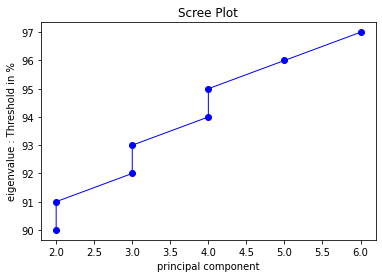

In [49]:
import matplotlib.pyplot as plt
plt.plot(components,range(90,97+1,1),'ro-',linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('principal component')
plt.ylabel('eigenvalue : Threshold in %')
plt.show()